# PCA - Word embedding BERT

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D.pkl".format(TARGET_DATASET))
df

,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
0,0.173161,14.613870,101,[CLS],20000.0,60000.0,80000.0,-0.500000
1,0.116970,3.078431,10166,wow,186.0,228.0,414.0,-0.101449
2,18.782453,5.475207,19387,rt,4292.0,19088.0,23380.0,-0.632849
3,7.615285,-11.874197,16099,porsche,4.0,0.0,4.0,1.000000
4,6.117087,13.290936,5665,ill,58.0,62.0,120.0,-0.033333
...,...,...,...,...,...,...,...,...
14834,-1.773077,7.118910,22878,midday,0.0,2.0,2.0,-1.000000
14835,18.237504,-3.956028,26701,merritt,0.0,2.0,2.0,-1.000000
14836,-14.957819,-10.361402,9141,circulation,0.0,2.0,2.0,-1.000000
14837,4.706775,-10.334234,17411,oswald,0.0,2.0,2.0,-1.000000


### Keep rows which occurence is above threshold

In [2]:
t = 30
print('Threshold value: {}'.format(t))
df = df[df['#']>t]
df

Threshold value: 30


,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
0,0.173161,14.613870,101,[CLS],20000.0,60000.0,80000.0,-0.500000
1,0.116970,3.078431,10166,wow,186.0,228.0,414.0,-0.101449
2,18.782453,5.475207,19387,rt,4292.0,19088.0,23380.0,-0.632849
4,6.117087,13.290936,5665,ill,58.0,62.0,120.0,-0.033333
5,-11.753455,9.779951,2360,say,316.0,968.0,1284.0,-0.507788
...,...,...,...,...,...,...,...,...
13899,-10.592226,0.084494,6996,ruling,0.0,42.0,42.0,-1.000000
13914,-6.186525,-9.196961,27352,affirmative,0.0,32.0,32.0,-1.000000
13922,8.627674,-18.319842,22129,hamas,0.0,82.0,82.0,-1.000000
13933,3.882772,0.689881,23458,trillion,0.0,60.0,60.0,-1.000000


### Occurence histogram

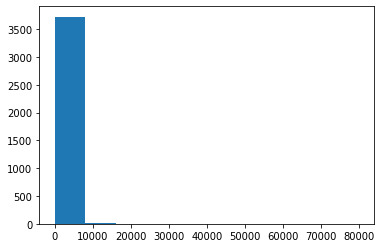

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['#'])
plt.show()

### Plot principal components

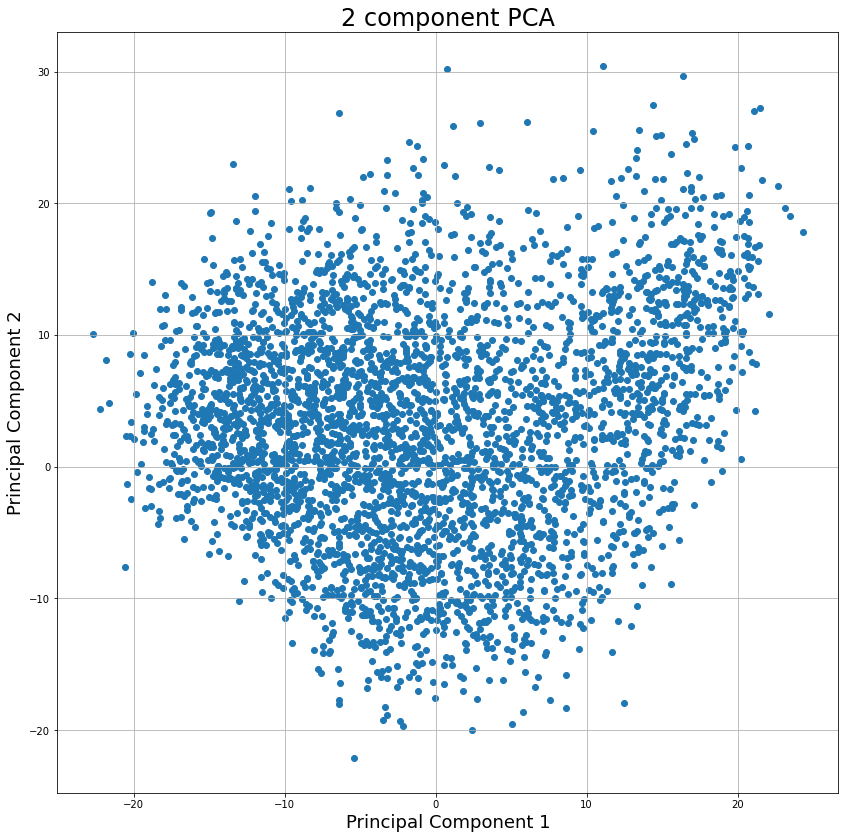

In [4]:
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(df["principal component 1"], df["principal component 2"])
ax.grid()

### Most discriminating ironic words

In [5]:
ironic_df = df.sort_values(by=['coefficient', '#'], ascending=False)
ironic_df = ironic_df[ironic_df['coefficient'] > 0.5]
'''
ironic_df = pd.concat([ironic_df[ironic_df['word'] == 'irony'],
                       ironic_df[ironic_df['word'] == 'ironic'],
                       ironic_df[ironic_df['word'] == 'sarcasm']])
'''
ironic_df

,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
8,8.443660,15.360685,19728,irony,7144.0,40.0,7184.0,0.988864
1311,-12.968902,5.864519,4159,titled,50.0,2.0,52.0,0.923077
3604,-12.965236,7.490612,5819,whilst,30.0,2.0,32.0,0.875000
6709,-10.043349,-2.975672,8271,woke,30.0,2.0,32.0,0.875000
366,-5.518958,9.419907,19313,ironic,208.0,16.0,224.0,0.857143
400,-10.074991,14.455918,3651,realized,62.0,8.0,70.0,0.771429
4281,-13.722288,-0.076105,17949,complaining,62.0,8.0,70.0,0.771429
589,-7.776029,16.148862,20443,overheard,30.0,4.0,34.0,0.764706
1365,-5.129536,14.271229,7818,expand,74.0,10.0,84.0,0.761905
3514,-6.513911,-2.063743,8618,bitter,44.0,6.0,50.0,0.760000


### Most discriminating non ironic words

In [6]:
nonironic_df = df.sort_values(by=['coefficient', '#'], ascending=True)
nonironic_df = nonironic_df[nonironic_df['coefficient'] < -0.75]
nonironic_df

,principal component 1,principal component 2,idx,word,#+,#-,#,coefficient
10800,-7.897934,2.961654,21082,sensible,0.0,32.0,32.0,-1.000000
10973,-8.303426,-1.568274,22676,internship,0.0,32.0,32.0,-1.000000
11142,-2.167400,-4.446510,19335,augmented,0.0,32.0,32.0,-1.000000
11144,-18.334973,3.933504,12992,boost,0.0,32.0,32.0,-1.000000
12791,6.883928,9.440220,26981,sweeps,0.0,32.0,32.0,-1.000000
...,...,...,...,...,...,...,...,...
4508,-4.979599,19.904006,8466,posts,14.0,100.0,114.0,-0.754386
5886,-3.350190,12.422997,4784,ideas,28.0,200.0,228.0,-0.754386
109,-0.685001,-2.571392,6077,dogs,16.0,114.0,130.0,-0.753846
4397,-3.923135,17.481126,11562,click,16.0,114.0,130.0,-0.753846


### Plot principal components: ironic vs non ironic¶

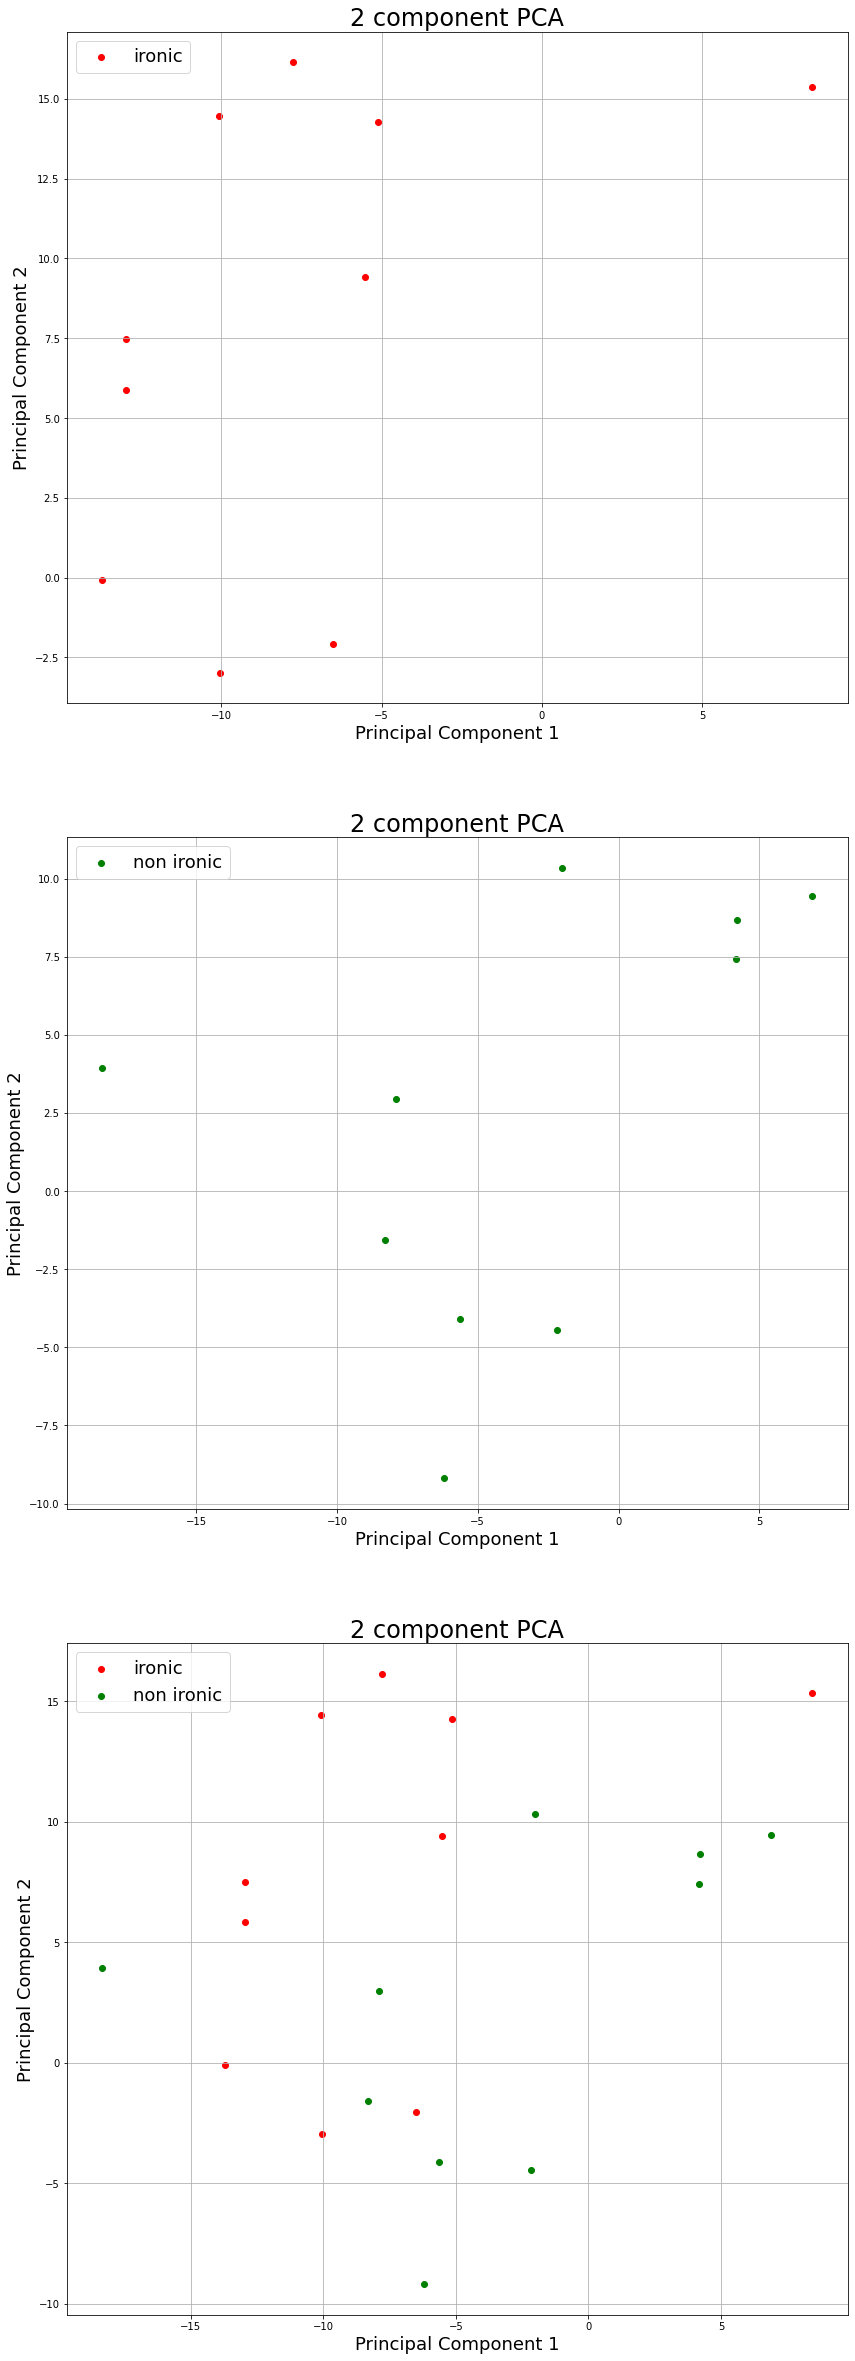

In [7]:
TOP_VALUE = 10
ironic_df = ironic_df.head(TOP_VALUE)
nonironic_df = nonironic_df.head(TOP_VALUE)

# Plot value
fig = plt.figure(figsize = (14, 14*3))

# Ironic
ax = fig.add_subplot(3,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Non ironic
ax = fig.add_subplot(3,1,2)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Both
ax = fig.add_subplot(3,1,3)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

plt.show()